In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

#%matplotlib notebook

In [4]:
def r_on_n(n, nu, b):
    return 2*nu*n+b

No handles with labels found to put in legend.


13 6
(13, 6)


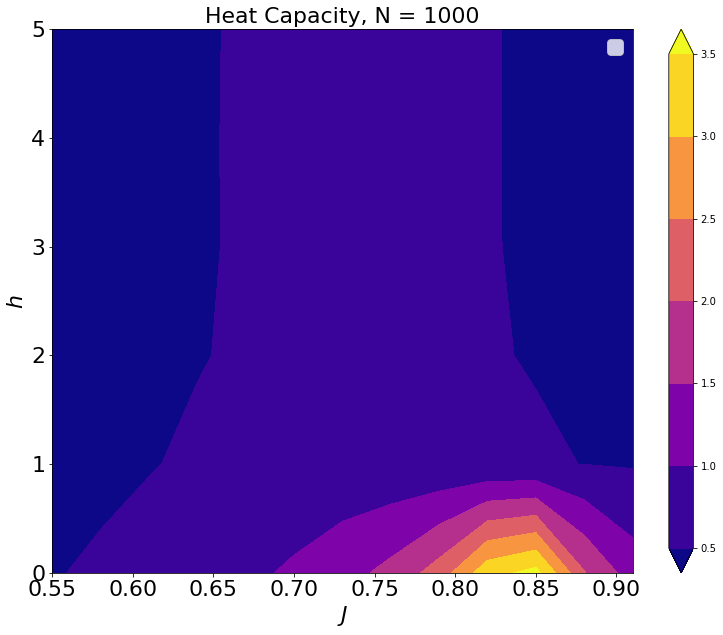

In [11]:
data_np = np.loadtxt("Ising/Add_field_far/longnear.txt")

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
#data_np = data_np[::, data_np[:,1].argsort()[::-1]]

#data_np = sorted(data_np, key=lambda a_entry: a_entry[1]) 
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l = 1000

data_l = data_np[data_np[:,0]==l]
J_l = np.unique(data_l[:, 1])
h_l = np.unique(data_l[:, 2])
 
data_draw = np.zeros((len(J_l), len(h_l)))

#for i in range(len(J_l)):
    #for j in range(len(h_l)):
        #data_draw[i,j] = data_l
    
    
J_l = data_l[:, 1] 
heat = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
 
J_l = np.unique(data_l[:, 1])
h_l = np.unique(data_l[:, 2])


heat =  heat.reshape(len(J_l), len(heat)//len(J_l))
errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]


 
print(len(J_l), len(h_l))
print(heat.shape )

 
plt.contourf(J_l, h_l, heat.T,extend='both', cmap = "plasma")
    
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ h  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)
plt.title("Heat Capacity, N = 1000", fontsize=22)
#plt.axvline(x=0, c="k" )
plt.colorbar()
plt.legend(loc="best", fontsize=20)

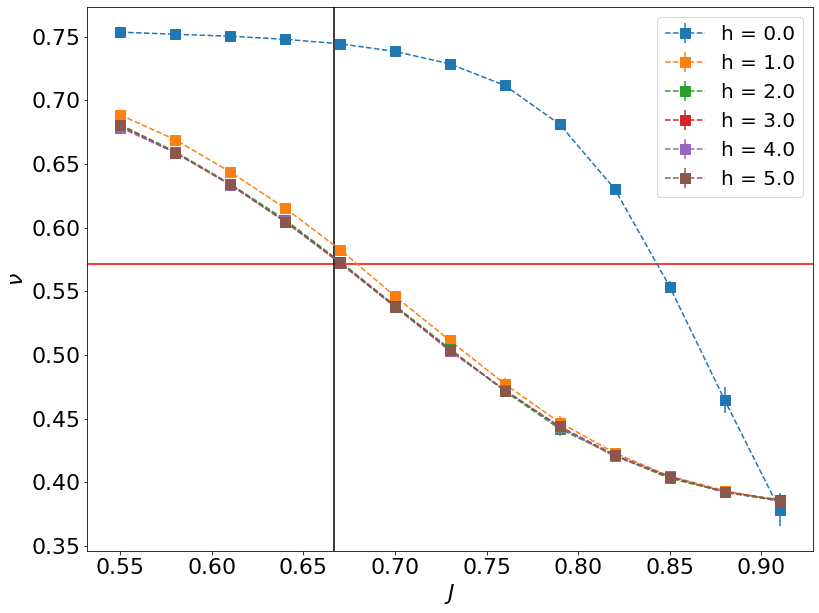

In [16]:
data_np = np.loadtxt("Ising/Add_field_far/longnear.txt", skiprows=1)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

hs = np.unique(data_np[:, 2])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

k1=1
k2=1


hs = np.unique(data_np[:, 2])
Js = np.unique(data_np[:, 1])


for h in hs:
    
    Rs = []
    Rs_err = []
    for j in Js:
        
        data_l = data_np[data_np[:,1]==j]
        data_l = data_l[data_l[:,2]==h]

        n_saw = data_l[:, 0]

        mean_r = data_l[:,3]
        err_r = data_l[:,4] 
        popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
         
        perr = np.sqrt(np.diag(pcov))
        sigma =perr[0]    
        
        Rs.append(popt[0])
        Rs_err.append(sigma)
    

    plt.errorbar(Js, Rs, yerr=Rs_err, fmt="s--", ms = 10, label = "h = " + str(h))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \nu $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 5)
plt.axhline(y=4/7, color='r', linestyle='-')

plt.axvline(x=0.667, c="k" )

plt.legend(loc="best", fontsize=20) 

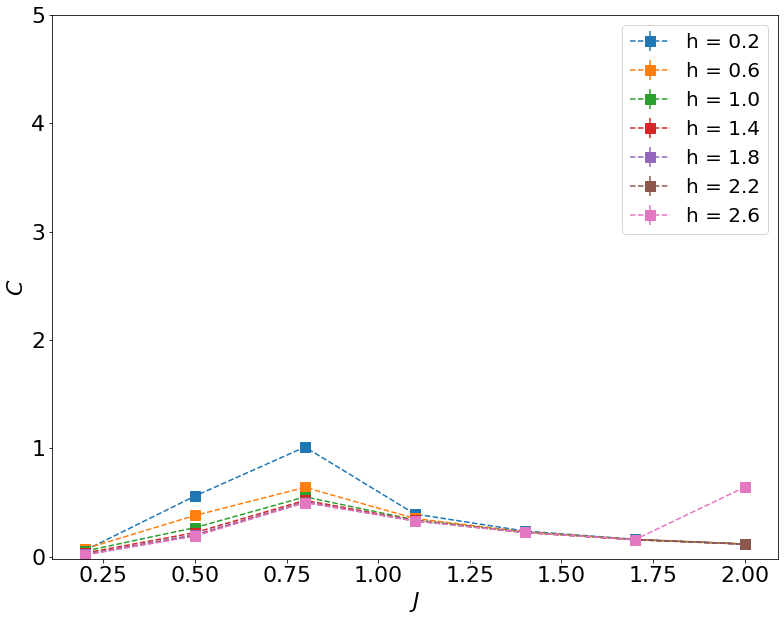

In [3]:
data_np = np.loadtxt("Ising/Add_field/longnear.txt", skiprows=1)
hs = np.unique(data_np[:, 2])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l = 500
for h in hs:
    data_l = data_np[data_np[:,0]==l]
    data_l = data_l[data_l[:,2]==h]
    J_l = data_l[:, 1]  
    heat = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
    #heat =  heat.reshape(len(J_l), len(heat)//len(J_l))
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]



    plt.errorbar(J_l, heat, yerr=errs, fmt="s--", ms = 10, label = "h = " + str(h))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 5)



plt.legend(loc="best", fontsize=20) 